In [1]:
import pandas as pd
import finnhub as fin
import json
import time
import numpy as np

In [2]:
#insert API key
fin_client = fin.Client(api_key="insert_your_API_key_here")

In [3]:
#read in the previously created csv
df = pd.read_csv('ESG_scores_with_ticker_exchange.csv')
df

,name,Environment,Emissions,Resource Use,Innovation,Social,Human Rights,Product Responsibiliy,Workforce,Community,Governance,Management,Shareholders,CSR Strategy,ESG Score,ticker,exchange
0,Amazon.com Inc,89,98,82,80,91,95,91,88,92,81,84,86,60.0,87,AMZN,NASDAQ
1,Chevron Corp,81,86,75,81,86,93,77,77,94,97,98,96,94.0,87,CVX,NYSE
2,Home Depot Inc,86,89,84,86,72,44,79,62,90,65,58,86,72.0,72,HD,NYSE
3,Elevance Health Inc,85,97,99,0,89,90,92,93,81,84,91,51,98.0,86,ELV,NYSE
4,Kroger Co,85,83,93,78,87,60,99,87,95,65,65,60,72.0,80,KR,NYSE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2810,Zoetis Inc,64,64,83,0,78,68,64,94,87,56,55,60,55.0,68,ZTS,NYSE
2811,Zumiez Inc,5,12,0,0,29,44,25,17,33,30,39,19,0.0,25,ZUMZ,NASDAQ
2812,Zuora Inc,27,57,45,0,60,73,35,75,67,48,59,17,40.0,50,ZUO,NYSE
2813,Zynerba Pharmaceuticals Inc,0,0,0,0,35,0,30,29,50,19,17,39,0.0,20,ZYNE,NASDAQ


In [4]:
#create a list out of the company tickers
ticker_list = df['ticker'].tolist()
ticker_list

['AMZN',
 'CVX',
 'HD',
 'ELV',
 'KR',
 'META',
 'LOW',
 'PG',
 'ACI',
 'DIS',
 'GS',
 'RTX',
 'BA',
 'TSLA',
 'ALL',
 'TJX',
 'PGR',
 'SNEX',
 'PAGP',
 'TMO',
 'TRV',
 'QCOM',
 'DHI',
 'CRM',
 'KHC',
 'USB',
 'BX',
 'HIG',
 'AFL',
 'MAN',
 'PCG',
 'CARR',
 'BKR',
 'SHW',
 'PNC',
 'KSS',
 'JLL',
 'SCHW',
 'MA',
 'DINO',
 'TXN',
 'VTRS',
 'HRB',
 'GT',
 'TRGP',
 'AEP',
 'GPS',
 'EL ',
 'LH',
 'OTIS',
 'GLW',
 'AMP',
 'ORLY',
 'RKT',
 'GWW',
 'ANDE',
 'CYH',
 'MOS',
 'DKS',
 'NEM',
 'WBD',
 'JBHT',
 'VST',
 'AES',
 'CZR',
 'EQH',
 'DGX',
 'TAP',
 'IPG',
 'WRB',
 'ODP',
 'HSY',
 'DAN',
 'JXN',
 'CG',
 'OVV',
 'COMM',
 'OC',
 'OPEN',
 'SJM',
 'HOUS',
 'GXO',
 'BCC',
 'BBWI',
 'TROW',
 'VRTX',
 'ARNC',
 'SAIC',
 'CLX',
 'TA ',
 'KLAC',
 'INGR',
 'ASO',
 'DDS',
 'ARKO',
 'FYBR',
 'A',
 'AA',
 'AAL',
 'AAOI',
 'AAON',
 'AAP',
 'AAPL',
 'AAT',
 'AXON',
 'AB',
 'ABB',
 'ABBV',
 'ABC',
 'ABCB',
 'ABEO',
 'ABEV',
 'ABG',
 'ABMD',
 'ABR',
 'ABT',
 'ABUS',
 'AC',
 'ACA',
 'ACAD',
 'ACB',
 'ACCO',
 

In [5]:
#create new dataframe to hold the percentage of women
df_women = pd.DataFrame(index=['Share of Women'])
df_women

""
Share of Women


In [6]:
#loop through the list of tickers and get the gender of each company's executives; 
#then calculate the share of female executives and add it to the df

counter = 0
for i in ticker_list:
    counter += 1
    executives = fin_client.company_executive(i)
    execs_sex = [item['sex'] for item in executives['executive']]
    female = execs_sex.count('female')
    male = execs_sex.count('male')
    try:
        share_of_fems = round((female / (male + female))*100,2)
    except ZeroDivisionError:
        share_of_fems = 0
    
    df_women[i] = share_of_fems
    
    if counter % 100 == 0:
        time.sleep(30)
    
df_women

,AMZN,CVX,HD,ELV,KR,META,LOW,PG,ACI,DIS,...,ZEN,ZEUS,ZM,ZS,ZTO,ZTS,ZUMZ,ZUO,ZYNE,ZYXI
Share of Women,40.0,37.5,26.09,33.33,44.0,37.5,31.58,50.0,28.57,50.0,...,31.58,25.0,27.78,16.67,7.14,40.91,21.43,28.57,16.67,16.67


In [7]:
#create a new Dataframe to hold the company revenue
df_revs = pd.DataFrame(index=['Avg revenue'])
df_revs

""
Avg revenue


In [9]:
#loop through the tickers and get the annual revenue for each company;
#then calculate the average revenue over the last four years (2021 through 2018)

counter = 0
revs = []

for i in ticker_list: 
    counter += 1 
    finance = fin_client.financials(i, 'ic', 'annual')
    try:
        revs = [item['revenue'] for item in finance['financials']]
    except (KeyError, TypeError):
        continue
        
    four_revs = revs[:4]
    avg = round(sum(four_revs)/4)
    df_revs[i] = avg
    
    revs = []
    
    if counter % 100 == 0:
        time.sleep(30)
    
df_revs

,AMZN,CVX,HD,ELV,KR,META,LOW,PG,ACI,DIS,...,ZEN,ZEUS,ZM,ZS,ZTO,ZTS,ZUMZ,ZUO,ZYNE,ZYXI
Avg revenue,342324,137250,125424,114224,128458,82607,82326,73735,66142,65462,...,946,1710,1926,625,23834,6634,1047,291,0,72


In [10]:
#create a new dataframe to hold the employee number for each company
df_employees = pd.DataFrame(index=['Employees'])
df_employees

""
Employees


In [11]:
#loop through the tickers and get the employee number for each company

counter = 0
for i in ticker_list:  
    counter += 1 
    profile = fin_client.company_profile(symbol=i)
    try:
        emps = profile['employeeTotal']
    except (KeyError, TypeError):
        continue
        
    df_employees[i] = emps
    
    if counter % 100 == 0:
        time.sleep(30)
    
df_employees

,AMZN,CVX,HD,ELV,KR,META,LOW,PG,ACI,DIS,...,ZEN,ZEUS,ZM,ZS,ZTO,ZTS,ZUMZ,ZUO,ZYNE,ZYXI
Employees,1608000,42595,490600,98200,420000,83553,200000,106000,290000,190000,...,6540,1644,8044,4975,23865,12100,2500,1393,28,774


In [12]:
#create a new dataframe to hold the industry group for each company
df_group = pd.DataFrame(index=['Group'])
df_group

""
Group


In [13]:
#loop through the tickers and get the industry group for each company

counter = 0
for i in ticker_list: 
    counter += 1 
    profile = fin_client.company_profile(symbol=i)
    try:
        group = profile['ggroup']
    except (KeyError, TypeError):
        continue
    
    df_group[i] = group
    
    if counter % 100 == 0:
        time.sleep(30)
    
df_group

,AMZN,CVX,HD,ELV,KR,META,LOW,PG,ACI,DIS,...,ZEN,ZEUS,ZM,ZS,ZTO,ZTS,ZUMZ,ZUO,ZYNE,ZYXI
Group,Retailing,Energy,Retailing,Health Care Equipment & Services,Food & Staples Retailing,Media & Entertainment,Retailing,Household & Personal Products,Food & Staples Retailing,Media & Entertainment,...,Software & Services,Materials,Software & Services,Software & Services,Transportation,"Pharmaceuticals, Biotechnology & Life Sciences",Retailing,Software & Services,"Pharmaceuticals, Biotechnology & Life Sciences",Health Care Equipment & Services


In [14]:
#create a new dataframe to hold the industry sector for each company
df_sector = pd.DataFrame(index=['Sector'])
df_sector

""
Sector


In [15]:
#loop through the tickers and get the industry sector for each company

counter = 0
for i in ticker_list:
    counter += 1 
    profile = fin_client.company_profile(symbol=i)
    try:
        sector = profile['gsector']
    except (KeyError, TypeError):
        continue
        print(f"No industry sector for {i} available")
    
    df_sector[i] = sector
    
    if counter % 100 == 0:
        time.sleep(30)
    
df_sector

,AMZN,CVX,HD,ELV,KR,META,LOW,PG,ACI,DIS,...,ZEN,ZEUS,ZM,ZS,ZTO,ZTS,ZUMZ,ZUO,ZYNE,ZYXI
Sector,Consumer Discretionary,Energy,Consumer Discretionary,Health Care,Consumer Staples,Communication Services,Consumer Discretionary,Consumer Staples,Consumer Staples,Communication Services,...,Information Technology,Materials,Information Technology,Information Technology,Industrials,Health Care,Consumer Discretionary,Information Technology,Health Care,Health Care


In [16]:
# join all the dataframes together for each company/ticker
df_list = [df_women, df_revs, df_employees, df_group, df_sector]
df_finn = pd.concat(df_list, axis=0) 
df_finn

,AMZN,CVX,HD,ELV,KR,META,LOW,PG,ACI,DIS,...,ZEN,ZEUS,ZM,ZS,ZTO,ZTS,ZUMZ,ZUO,ZYNE,ZYXI
Share of Women,40.0,37.5,26.09,33.33,44.0,37.5,31.58,50.0,28.57,50.0,...,31.58,25.0,27.78,16.67,7.14,40.91,21.43,28.57,16.67,16.67
Avg revenue,342324,137250,125424,114224,128458,82607,82326,73735,66142,65462,...,946,1710,1926,625,23834,6634,1047,291,0,72
Employees,1608000,42595,490600,98200,420000,83553,200000,106000,290000,190000,...,6540,1644,8044,4975,23865,12100,2500,1393,28,774
Group,Retailing,Energy,Retailing,Health Care Equipment & Services,Food & Staples Retailing,Media & Entertainment,Retailing,Household & Personal Products,Food & Staples Retailing,Media & Entertainment,...,Software & Services,Materials,Software & Services,Software & Services,Transportation,"Pharmaceuticals, Biotechnology & Life Sciences",Retailing,Software & Services,"Pharmaceuticals, Biotechnology & Life Sciences",Health Care Equipment & Services
Sector,Consumer Discretionary,Energy,Consumer Discretionary,Health Care,Consumer Staples,Communication Services,Consumer Discretionary,Consumer Staples,Consumer Staples,Communication Services,...,Information Technology,Materials,Information Technology,Information Technology,Industrials,Health Care,Consumer Discretionary,Information Technology,Health Care,Health Care


In [17]:
df_finnhub = df_finn.transpose()
df_finnhub.index.rename('ticker', inplace=True)
df_finnhub

,Share of Women,Avg revenue,Employees,Group,Sector
ticker,,,,,
AMZN,40.0,342324,1608000,Retailing,Consumer Discretionary
CVX,37.5,137250,42595,Energy,Energy
HD,26.09,125424,490600,Retailing,Consumer Discretionary
ELV,33.33,114224,98200,Health Care Equipment & Services,Health Care
KR,44.0,128458,420000,Food & Staples Retailing,Consumer Staples
...,...,...,...,...,...
ZTS,40.91,6634,12100,"Pharmaceuticals, Biotechnology & Life Sciences",Health Care
ZUMZ,21.43,1047,2500,Retailing,Consumer Discretionary
ZUO,28.57,291,1393,Software & Services,Information Technology


In [18]:
# read in the other spreadsheet with the ESG data and ticker symbols and merge the two dataframes
final_complete_df = pd.merge(df, 
                     df_finnhub, 
                     on ='ticker', 
                     how ='left')
final_complete_df

,name,Environment,Emissions,Resource Use,Innovation,Social,Human Rights,Product Responsibiliy,Workforce,Community,...,Shareholders,CSR Strategy,ESG Score,ticker,exchange,Share of Women,Avg revenue,Employees,Group,Sector
0,Amazon.com Inc,89,98,82,80,91,95,91,88,92,...,86,60.0,87,AMZN,NASDAQ,40.0,342324,1608000,Retailing,Consumer Discretionary
1,Chevron Corp,81,86,75,81,86,93,77,77,94,...,96,94.0,87,CVX,NYSE,37.5,137250,42595,Energy,Energy
2,Home Depot Inc,86,89,84,86,72,44,79,62,90,...,86,72.0,72,HD,NYSE,26.09,125424,490600,Retailing,Consumer Discretionary
3,Elevance Health Inc,85,97,99,0,89,90,92,93,81,...,51,98.0,86,ELV,NYSE,33.33,114224,98200,Health Care Equipment & Services,Health Care
4,Kroger Co,85,83,93,78,87,60,99,87,95,...,60,72.0,80,KR,NYSE,44.0,128458,420000,Food & Staples Retailing,Consumer Staples
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2810,Zoetis Inc,64,64,83,0,78,68,64,94,87,...,60,55.0,68,ZTS,NYSE,40.91,6634,12100,"Pharmaceuticals, Biotechnology & Life Sciences",Health Care
2811,Zumiez Inc,5,12,0,0,29,44,25,17,33,...,19,0.0,25,ZUMZ,NASDAQ,21.43,1047,2500,Retailing,Consumer Discretionary
2812,Zuora Inc,27,57,45,0,60,73,35,75,67,...,17,40.0,50,ZUO,NYSE,28.57,291,1393,Software & Services,Information Technology
2813,Zynerba Pharmaceuticals Inc,0,0,0,0,35,0,30,29,50,...,39,0.0,20,ZYNE,NASDAQ,16.67,0,28,"Pharmaceuticals, Biotechnology & Life Sciences",Health Care


In [19]:
final_complete_df.to_csv("final_ESG_score_finnhub_data.csv", index=False)

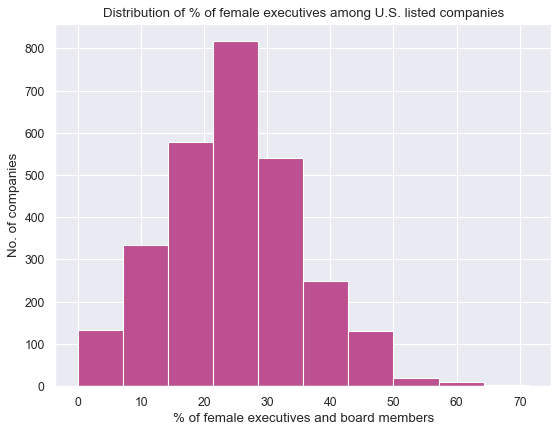

In [23]:
# use matplotlib to get a sense of the distribution of female executives and directors

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80)

plt.hist(final_complete_df['Share of Women'], color='#bc5090')
plt.title("Distribution of % of female executives among U.S. listed companies")
plt.ylabel("No. of companies")
plt.xlabel("% of female executives and board members")
plt.savefig("women_share_distribution.png", dpi=100)
plt.show()